In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import datetime as dt 
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the TensorBoard notebook extension
# %load_ext tensorboard

# Not required in vs code
# https://devblogs.microsoft.com/python/python-in-visual-studio-code-february-2021-release/

In [3]:
data= pd.read_csv("../DATA/fake_reg.csv")
data.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
data.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [6]:
data.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

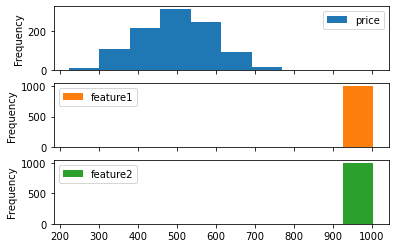

In [7]:
data.plot(kind="hist", subplots=True)

<AxesSubplot:xlabel='feature1', ylabel='price'>

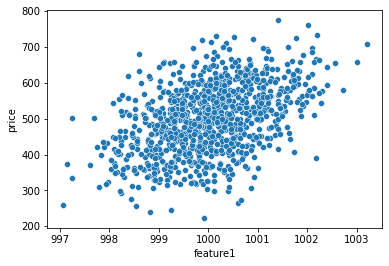

In [8]:
sns.scatterplot(x="feature1", y="price", data=data)

<AxesSubplot:xlabel='feature2', ylabel='price'>

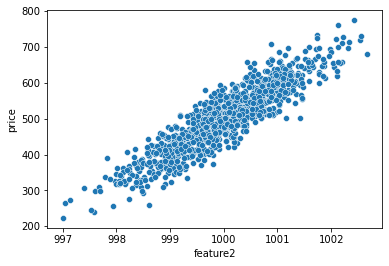

In [9]:
sns.scatterplot(x="feature2", y="price", data=data)

<AxesSubplot:>

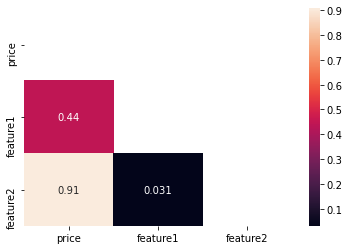

In [10]:
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

# Feature 2 is highly corelated with price than feature-1

In [11]:
x= data.drop("price", axis=1)
y=data.price
x.shape, y.shape

((1000, 2), (1000,))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=42)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [14]:
def get_callback_logdir() :
    curr_time= dt.datetime.now().strftime("%Y%m%d-%H%M%S")
    log_dir= "./logs/fit/"+curr_time
    callback= keras.callbacks.TensorBoard(log_dir=log_dir )
    return callback


In [15]:
model1= keras.Sequential([
    keras.layers.Dense(units=2, activation=None),
    keras.layers.Dense(units=1)
])

model1.compile(loss=keras.losses.mse, optimizer= keras.optimizers.SGD(learning_rate=0.001), metrics=["mse"])

model1_history= model1.fit(x_train,y_train, epochs=100, validation_split=0.2, callbacks=[get_callback_logdir()])





Epoch 1/100
 1/18 [>.............................] - ETA: 0s - loss: 272701.9375 - mse: 272701.9375WARNING:tensorflow:From C:\Users\DE20015030\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
18/18 [==============================] - 1s 36ms/step - loss: 74371.0391 - mse: 74371.0391 - val_loss: 125807.4844 - val_mse: 125807.4844
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 26583.4492 - mse: 26583.4492 - val_loss: 3304.4146 - val_mse: 3304.4146
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 19003.4316 - mse: 19003.4316 - val_loss: 75708.9609 - val_mse: 75708.9609
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 44206.6328 - mse: 44206.6328 - val_loss: 46445.1094 - val_mse: 46445.1094
Epoch 5/100
18/18 [==================

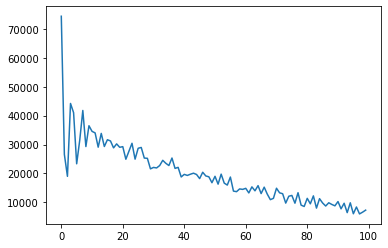

In [16]:
plt.plot(model1_history.history["mse"])

In [17]:
# changing the layer and adding Neurons

tf.random.set_seed(42)

model2= keras.Sequential([
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=4, activation="relu"),
    keras.layers.Dense(units=2, activation="relu"),
    keras.layers.Dense(units=1)
], name="model-2")

model2.compile(loss=keras.losses.mse, optimizer= keras.optimizers.Adam(learning_rate=0.01), metrics=["mse"])

model2_history= model2.fit(x_train,y_train, epochs=150, validation_split=0.23 ) #callbacks=[get_callback_logdir()]

: 117297.2188 - val_mse: 117297.2188
Epoch 8/150
17/17 [==============================] - 0s 3ms/step - loss: 76739.7031 - mse: 76739.7031 - val_loss: 45069.4805 - val_mse: 45069.4805
Epoch 9/150
17/17 [==============================] - 0s 3ms/step - loss: 19884.8301 - mse: 19884.8301 - val_loss: 6038.6255 - val_mse: 6038.6255
Epoch 10/150
17/17 [==============================] - 0s 3ms/step - loss: 2926.2429 - mse: 2926.2429 - val_loss: 2556.0640 - val_mse: 2556.0640
Epoch 11/150
17/17 [==============================] - 0s 4ms/step - loss: 2883.4575 - mse: 2883.4575 - val_loss: 2332.2947 - val_mse: 2332.2947
Epoch 12/150
17/17 [==============================] - 0s 4ms/step - loss: 2413.6553 - mse: 2413.6553 - val_loss: 2451.6765 - val_mse: 2451.6765
Epoch 13/150
17/17 [==============================] - 0s 3ms/step - loss: 2343.6123 - mse: 2343.6123 - val_loss: 2368.9626 - val_mse: 2368.9626
Epoch 14/150
17/17 [==============================] - 0s 4ms/step - loss: 2282.2483 - mse: 2282

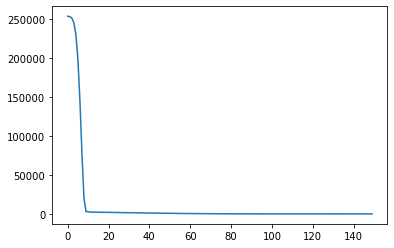

In [18]:
plt.plot(model2_history.history["mse"])

In [19]:
model2.evaluate(x_test,y_test), model2.evaluate(x_train,y_train)

22/22 [==============================] - 0s 818us/step - loss: 23.9186 - mse: 23.9186


([25.04891014099121, 25.04891014099121],
 [23.918563842773438, 23.918563842773438])

In [20]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2 

preds= model2.predict(x_test)

mse(y_test, preds), r2(y_test, preds)

(25.048912895614368, 0.9971509528344676)

<AxesSubplot:xlabel='price', ylabel='Density'>

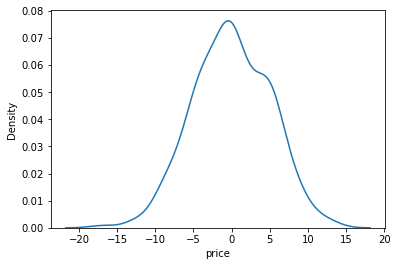

In [21]:
sns.kdeplot(y_test-preds.flat)
# preds.shape, y_test.shape

In [22]:
# Predicting new data
new_gem = [[998,1000]]

model2.predict(scaler.transform(new_gem))

array([[419.905]], dtype=float32)

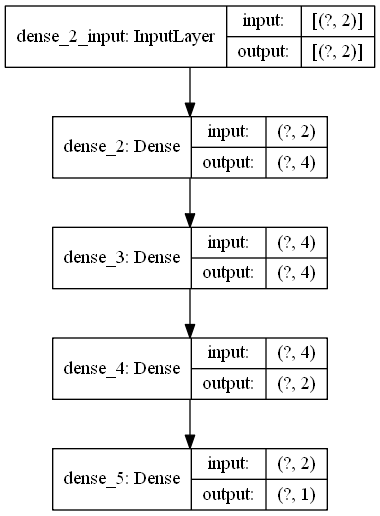

In [23]:
# Seeing the model
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
from tensorflow.keras.utils import plot_model

plot_model(model2, show_shapes=True)

In [24]:
#saving the model
model2.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'


In [25]:
# Loading the same model
from tensorflow.keras.models import load_model
later_model = load_model('my_model.h5')
later_model.predict(scaler.transform(new_gem))

array([[419.905]], dtype=float32)

In [2]:
# tensorboard --logdir logs/fit
# %load_ext tensorboard
# %tensorboard --logdir logs